In [0]:
%matplotlib inline

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function 

In [0]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist=input_data.read_data_sets("MNIST_data",one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fc1737e9a90>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fc1331ca350>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fc12c069110>)

In [6]:
mnist.train.images.shape

(55000, 784)

In [7]:
mnist.train.labels.shape

(55000, 10)

In [0]:
x=tf.placeholder(tf.float32,[None,784])
y_=tf.placeholder(tf.float32,[None,10])

W=tf.Variable(tf.zeros([784,10]))
b=tf.Variable(tf.zeros([10]))

In [0]:
y=tf.matmul(x,W)+b

In [0]:
cost_func=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_,logits=y)) 

In [0]:
train_step=tf.train.GradientDescentOptimizer(0.5).minimize(cost_func)

In [0]:
sess=tf.InteractiveSession()

tf.global_variables_initializer().run()

In [0]:
for _ in range(100):
  x_batch,y_batch=mnist.train.next_batch(50)
  sess.run(train_step,feed_dict={x:x_batch,y_ :y_batch})

In [19]:
correct_prediction=tf.equal(tf.arg_max(y,1),tf.argmax(y_,1))

accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

print(sess.run(accuracy,feed_dict={x:mnist.test.images,y_:mnist.test.labels}))

0.8847


In [0]:
testimage=mnist.test.images[122]



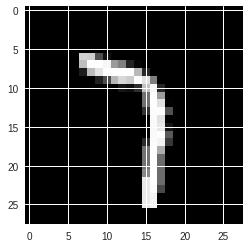

In [48]:
plt.imshow(testimage.reshape(28,28),cmap='gray')
plt.show()

In [0]:
prediction=tf.arg_max(y,1)


In [50]:
prediction.eval(feed_dict={x: [testimage]},session=sess)

array([7])